In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from numpy.linalg import svd
from numpy import array, matrix, linalg
from clean_data import clean_data, pivot_data

In [3]:
df = pd.read_csv('../../StateNames.csv')
df = clean_data(df)

In [4]:
names_total = df.groupby('name_gender')['Count_by_name'].sum()

In [5]:
updated_df = df.join(names_total, how='left', on='name_gender', lsuffix='_per_year')

In [6]:
non_popular_df = updated_df[(updated_df['Count_by_name_per_year'] >= 150)&(updated_df['Count_by_name_per_year'] < 900000)]

In [7]:
name_index_pivot = pivot_data(non_popular_df, 'count_norm', non_popular_df.name_gender, non_popular_df.tuple_index)

In [12]:
name_index_pivot.shape

(1583, 4813)

In [51]:
U, sigma, VT = svd(name_index_pivot)

In [9]:
U.shape

(1583, 1583)

In [10]:
VT.shape

(4813, 4813)

In [13]:
names = name_index_pivot.index.values

In [14]:
year_state = name_index_pivot.columns

In [15]:
# U = pd.DataFrame(U, index=names)
# VT = pd.DataFrame(VT, columns=year_state)

In [44]:
sigma[:15]

array([ 3.4898655 ,  1.84801596,  1.30388314,  0.88890156,  0.75521517,
        0.7280317 ,  0.63627255,  0.57400057,  0.51625324,  0.48306888,
        0.4630439 ,  0.40039766,  0.38613673,  0.35931586,  0.3486764 ])

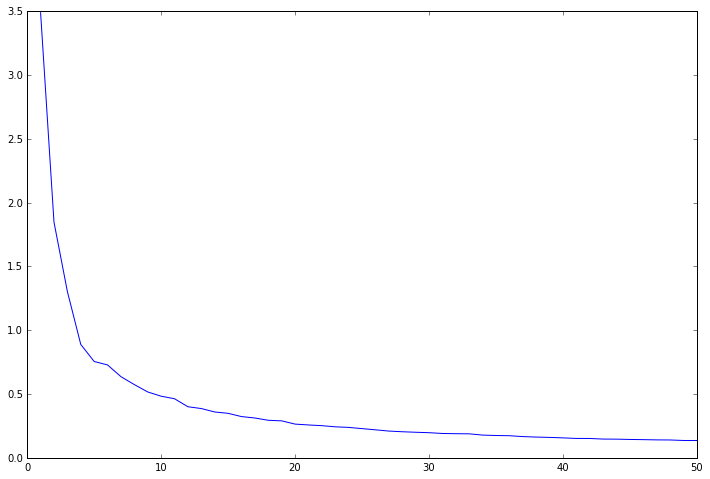

In [23]:
fig = plt.figure(figsize=(12,8))
x = array([x+1 for x in range(50)])
plt.plot(x, sigma[:50])

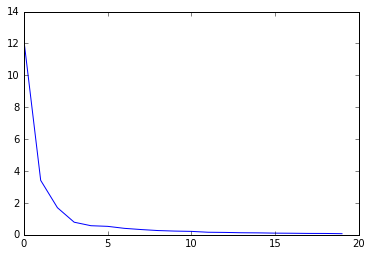

In [27]:
plt.plot((sigma ** 2)[:20])

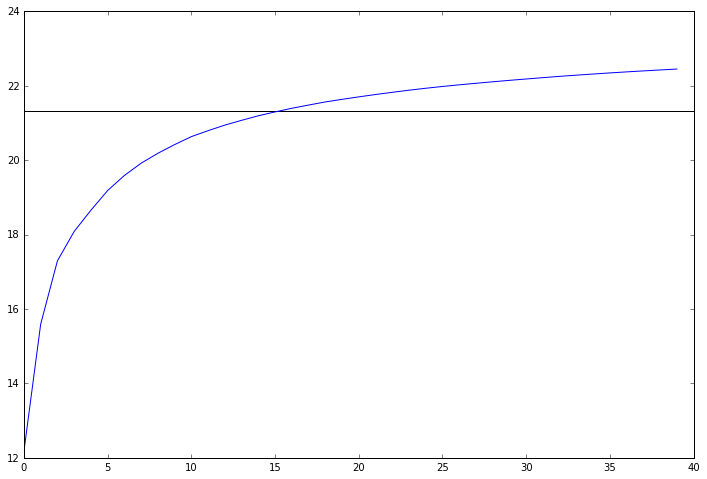

In [40]:
#Looks like 90% of the cumalitive power/variance is explained at about 15 latent features
fig = plt.figure(figsize=(12,8))
cumulative = np.cumsum(sigma ** 2)[:40]
plt.plot(cumulative)
plt.hlines(21.33,0,40)

In [34]:
total_energy = np.sum(sigma ** 2)

In [36]:
total_energy * .9

21.334160378587651

In [55]:
VT_15 = VT[:15,:]

In [57]:
features = year_state
for i, row in enumerate(VT_15):
    top_features = [year_state[index] for index in row.argsort()[:-10-1:-1]]
    print top_features

[(2012, 'NM'), (2009, 'NM'), (2010, 'NM'), (2010, 'NE'), (2011, 'WV'), (2004, 'ID'), (2003, 'ID'), (2006, 'ID'), (2012, 'NE'), (2013, 'WV')]
[(1923, 'IN'), (1921, 'IN'), (1924, 'IN'), (1922, 'IN'), (1925, 'IN'), (1927, 'IN'), (1920, 'IN'), (1919, 'IN'), (1917, 'IN'), (1916, 'IN')]
[(1910, 'PA'), (1911, 'PA'), (1910, 'MA'), (1913, 'PA'), (1911, 'MA'), (1914, 'PA'), (1912, 'PA'), (1915, 'PA'), (1911, 'NJ'), (1911, 'OH')]
[(1972, 'IA'), (1971, 'IA'), (1972, 'WI'), (1972, 'MN'), (1972, 'NE'), (1973, 'WI'), (1971, 'MN'), (1970, 'IA'), (1974, 'NE'), (1973, 'IA')]
[(1923, 'SC'), (1919, 'SC'), (1922, 'AL'), (1915, 'SC'), (1922, 'SC'), (1910, 'MD'), (1918, 'SC'), (1920, 'SC'), (1921, 'SC'), (1925, 'AL')]
[(1945, 'AR'), (1944, 'AR'), (1943, 'AR'), (1942, 'AR'), (1936, 'AR'), (1939, 'AR'), (1940, 'AR'), (1946, 'AR'), (1941, 'TN'), (1939, 'TN')]
[(1927, 'DC'), (1953, 'DE'), (1946, 'DE'), (1945, 'NH'), (1942, 'DE'), (1943, 'DE'), (1928, 'DC'), (1921, 'DC'), (1944, 'DE'), (1943, 'NH')]
[(1910, 'MA')